# INTEGRATED CA - MACHINE LEARNING AND DATA VISUALISATION

### Student - Linika Almeida, ID - 2023045

### DESCRIPTION

The dataset was collected in the kaggle website. It provides information about Customer Shopping Preferences and offers insights into consumer behavior and purchasing patterns. This dataset provide a range of customer attributes including age, gender, purchase history, preferred payment methods and more.

##### Main Goal
Use the dataset to apply filtering, market basket and make a Dashboard.
______________________

#### The meaning of each column in the data is as below
1. Customer ID - Unique identifier for each customer
2. Age- Age of the customer
3. Gender - Gender of the customer (Male/Female)
4. Item Purchased - The item purchased by the customer
5. Category - Category of the item purchased
6. Purchase Amount (USD) - The amount of the purchase in USD
7. Location - Location where the purchase was made
8. Size - Size of the purchased item
9. Color - Color of the purchased item
10. Season - Season during which the purchase was made
11. Review Rating - Rating given by the customer for the purchased item
12. Subscription Status - Indicates if the customer has a subscription (Yes/No)
13. Shipping Type - Type of shipping chosen by the customer
14. Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)
15. Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)
16. Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
17. Payment Method - Customer's most preferred payment method
18. Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)


Github Repository: https://github.com/linikaalmeida2023/Machine-Learning-and-Data-Visualization

#### Import Libraries

In [149]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

import folium
from ipywidgets import Layout
from ipywidgets import Layout, VBox, HBox

In [215]:
#pip install scikit-surprise

In [216]:
#pip install pandas plotly

In [217]:
#!pip install pandas plotly ipywidgets

In [218]:
#!pip install --upgrade plotly

In [219]:
#pip install dash

In [220]:
#pip install dash[all]

In [221]:
#pip install dash dash-core-components dash-html-components plotly

In [222]:
#pip install folium

In [159]:
# Read dataset
df1 = pd.read_csv('shopping_trends.csv')

I will add some fields in this dataset such as Member Number, Item Quantity and Date to complement the dataset and achieve the requirements requested in this project

In [160]:
# Create new columns
df2 = pd.DataFrame({
    'Member_number': np.random.randint(1000, 2000, 3901),  
    'Item_Quantity': np.random.randint(1, 50, 3901), 
    'Date': pd.date_range(start='2012-01-01', periods=3901, freq='D'),  
})

# Extract date information
df2['year'] = df2['Date'].dt.year
df2['month'] = df2['Date'].dt.month
df2['day'] = df2['Date'].dt.day
df2['day_of_week'] = df2['Date'].dt.day_of_week

In [161]:
# Concat df1 and df2
df = pd.concat([df1, df2], axis=1)

### EXPLORATORY DATA ANALYSIS (EDA)

In the EDA we are going to do some assumptions, do a comprehension of the dataset and check missing values

In [162]:
#Display the first few rows
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Member_number,Item_Quantity,Date,year,month,day,day_of_week
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,14.0,Venmo,Fortnightly,1982,7,2012-01-01,2012,1,1,6
1,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,2.0,Cash,Fortnightly,1921,21,2012-01-02,2012,1,2,0
2,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,23.0,Credit Card,Weekly,1568,13,2012-01-03,2012,1,3,1
3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,49.0,PayPal,Weekly,1898,1,2012-01-04,2012,1,4,2
4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,...,31.0,PayPal,Annually,1374,21,2012-01-05,2012,1,5,3


In [163]:
#Save new dataset with new columns in a csv file
csv_file_name = 'shopping_trends_complete.csv'
df.to_csv(csv_file_name, index=False)

Lets check some information in this dataset

In [164]:
#Display the summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901 entries, 0 to 3900
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer ID               3900 non-null   float64       
 1   Age                       3900 non-null   float64       
 2   Gender                    3900 non-null   object        
 3   Item Purchased            3900 non-null   object        
 4   Category                  3900 non-null   object        
 5   Purchase Amount (USD)     3900 non-null   float64       
 6   Location                  3900 non-null   object        
 7   Size                      3900 non-null   object        
 8   Color                     3900 non-null   object        
 9   Season                    3900 non-null   object        
 10  Review Rating             3900 non-null   float64       
 11  Subscription Status       3900 non-null   object        
 12  Payment Method      

In [165]:
#Show the number of missing (NaN values) per column
print(df.isnull().sum())

Customer ID                 1
Age                         1
Gender                      1
Item Purchased              1
Category                    1
Purchase Amount (USD)       1
Location                    1
Size                        1
Color                       1
Season                      1
Review Rating               1
Subscription Status         1
Payment Method              1
Shipping Type               1
Discount Applied            1
Promo Code Used             1
Previous Purchases          1
Preferred Payment Method    1
Frequency of Purchases      1
Member_number               0
Item_Quantity               0
Date                        0
year                        0
month                       0
day                         0
day_of_week                 0
dtype: int64


In [166]:
#Show number of unique values per column
df.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
Member_number                978
Item_Quantity                 49
Date                        3901
year                          11
month                         12
day                           31
day_of_week                    7
dtype: int64

##### In a previous analyse is possible to notice:

In data.info this dataset is distributed in 3901 entries and 25 columns. And there are data with different type, being float64, int32, object and datetime64

In df.type we observed there are datetime64(1), float64(5), int32(6), object(14).

isnull().sum() shows the columns  presents only one line of missing values in this dataset.
___

#### Now I am going to investigate the dataset to get some insigts
* Make some plots
* Check Correlation

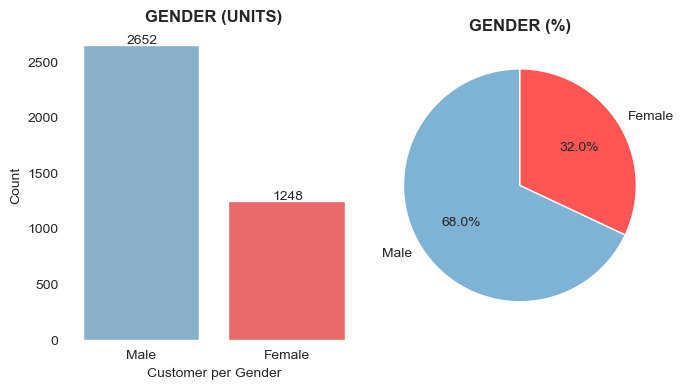

In [167]:
# Set white background
sns.set_style("whitegrid")

# Define colors
colors = ['#7FB3D5', '#FF5555']
sns.set_palette(colors)

# Figure with two plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
fig.patch.set_facecolor('white')  # Set background color for the figure

# Plot for Heart Stroke Cases
ax1 = sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index, ax=axes[0])
ax1.set_title('GENDER (UNITS)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Customer per Gender', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.grid(False)

# Remove border around the bar plot
for spine in ax1.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 8), fontsize=10)

# Plot Pie chart with percentual for Gender
ax2 = plt.subplot(1, 2, 2)
explode = (0.1, 0) if len(df['Gender'].unique()) == 2 else None
ax2.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
ax2.set_title('GENDER (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('')

# Set background color for the subplot
ax2.set_facecolor('white')

# Show plot
plt.tight_layout()
plt.show()


In the graphic above the number of coustumer per gender is equivalent 68% for Male and 32% for Female

In [168]:
# Count the frequency of each unique Category
category_counts = df['Category'].value_counts()

# Get the 4 most common Category
top_4_category = category_counts.head(4)

# Print the results
print("The 5 most common category are:")
print(top_4_category)

The 5 most common category are:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


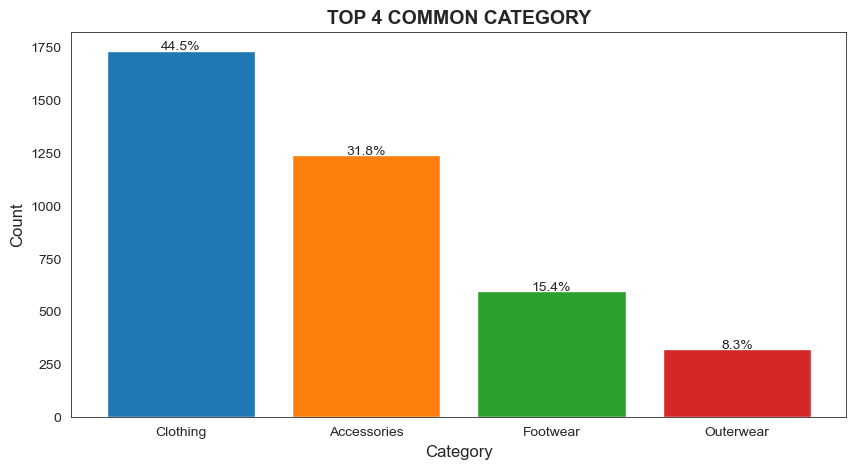

In [169]:
# Create a Pareto chart
plt.figure(figsize=(10, 5))

# Define a list of distinct colors (colorblind-friendly)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the Pareto chart with custom colors
for i, (Category, count) in enumerate(zip(top_4_category.index, top_4_category.values)):
    plt.bar(Category, count, color=colors[i])
    
    # Add percentage on top of each bar
    percentage = (count / top_4_category.sum()) * 100
    plt.text(Category, count + 1, f'{percentage:.1f}%', ha='center', fontsize=10, fontweight='normal')

plt.xlabel('Category', fontsize=12, fontweight='normal', fontname='Arial')
plt.ylabel('Count', fontsize=12, fontweight='normal', fontname='Arial')
plt.title('TOP 4 COMMON CATEGORY', fontsize=14, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Remove the grid lines
plt.grid(False)

# Rotate the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

The plot show the most commum category, being in first place of purchased for the customer the Category of Chothing with 44.5%, followed by Acessories, Footwear and in the last position Outerwear with 8.3%.

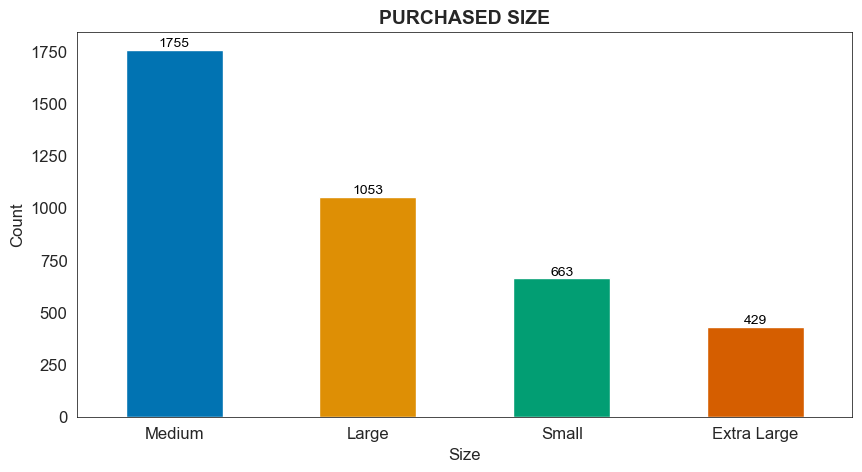

In [170]:
#Plot the purchased size

# Assuming 'Size' is a categorical variable 
size_counts = df['Size'].value_counts()

# Use a Seaborn color palette
colors = sns.color_palette('colorblind', len(size_counts))

#Define figure
plt.figure(figsize = (10, 5))
ax = df['Size'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 12)

plt.xlabel('Size', fontsize=12, fontweight='normal', fontname='Arial')
plt.ylabel('Count', fontsize=12, fontweight='normal', fontname='Arial')
plt.title('PURCHASED SIZE', fontsize=14, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Remove the grid lines
plt.grid(False)

# Rotate the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

The most purchased size is Medium, followed by Large, Small and in the last position Extra large

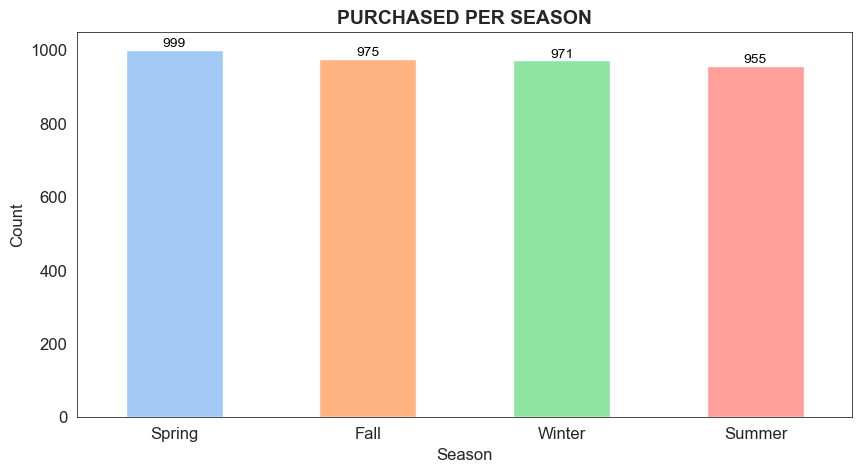

In [171]:
#Plot the purchased size

# Assuming 'Size' is a categorical variable 
season_counts = df['Season'].value_counts()

# Use a Seaborn color palette
colors = sns.color_palette('pastel', len(season_counts))

#Define figure
plt.figure(figsize = (10, 5))
ax = df['Season'].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 12)

plt.xlabel('Season', fontsize=12, fontweight='normal', fontname='Arial')
plt.ylabel('Count', fontsize=12, fontweight='normal', fontname='Arial')
plt.title('PURCHASED PER SEASON', fontsize=14, fontweight='bold', fontname='Arial')
plt.xticks(rotation=45, ha='right')

# Remove the grid lines
plt.grid(False)

# Rotate the x-axis labels
plt.xticks(rotation=0, ha='center')

# Add a border around the figure
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('black')

plt.show()

Customers usually shopping more during the spring and fall season, and during the summer do less shopping

### DATA PREPROCESSING

In [172]:
#Define NA as missing values NAN
missing_value_formats = ['NA']
df = pd.read_csv('Shopping_trends_complete.csv', na_values = missing_value_formats)

In [173]:
#Check the overall structure in this dataset
print('Number of records (rows) in the dataset are:', df.shape[0])
print('Number of features (columns) in the dataset are:', df.shape[1])
print('Number of values in the dataset are:', df.count().sum())
print('Number missing values in the dataset are:', sum(df.isna().sum()))

Number of records (rows) in the dataset are: 3901
Number of features (columns) in the dataset are: 26
Number of values in the dataset are: 101407
Number missing values in the dataset are: 19


As this dataset has only 19 NaN values, it will be dropped. This is a simple technique for cleaning the data and the exclusion of these values will not interfere in the final results

In [174]:
#Drop line with NA
df.dropna(inplace=True)

In [175]:
#Check NA per column
pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

Iam going to separate the columns categorica and numerical to deal with the dataset
##### Separate the datatype

In [176]:
# Separate categorical, binomial, and continuous data
categoricalColumns = df[['Gender', 'Category', 'Location', 'Size', 'Color',
                         'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 
                         'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 
                         'Frequency of Purchases', 'Item Purchased']]

continuousColumns = df[['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

othercolumns = df[['Member_number', 'Date', 'year', 'month', 'day', 'day_of_week']]

Before perform the machine learning model, the categorical data will be converted in binary type by using Hot encoding 

#### Hot encoding to transform categorical data in numerical data

In [177]:
# Apply hot encoding to convert categorical data in a binary data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder ()

for i in categoricalColumns:
    categoricalColumns[i] = LE.fit_transform(df[i])

In [178]:
# Check the categorical column after hot ecoding
categoricalColumns.head()

,Gender,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases,Item Purchased
0,1,1,16,0,7,3,1,2,1,1,1,5,3,2
1,1,1,18,0,12,3,1,0,1,1,1,1,3,23
2,1,1,20,2,12,1,1,1,2,1,1,2,6,11
3,1,2,38,1,12,1,1,4,3,1,1,4,6,14
4,1,1,36,1,21,1,1,1,2,1,1,4,0,2


After treating the data types separately, we will now join them into a single dataframe

In [179]:
#Join the dataset
completeDataset = pd.concat([categoricalColumns, continuousColumns, othercolumns], axis=1)
completeDataset.head()

,Gender,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,...,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Member_number,Date,year,month,day,day_of_week
0,1,1,16,0,7,3,1,2,1,1,...,55.0,53.0,3.1,14.0,1982,2012-01-01,2012,1,1,6
1,1,1,18,0,12,3,1,0,1,1,...,19.0,64.0,3.1,2.0,1921,2012-01-02,2012,1,2,0
2,1,1,20,2,12,1,1,1,2,1,...,50.0,73.0,3.1,23.0,1568,2012-01-03,2012,1,3,1
3,1,2,38,1,12,1,1,4,3,1,...,21.0,90.0,3.5,49.0,1898,2012-01-04,2012,1,4,2
4,1,1,36,1,21,1,1,1,2,1,...,45.0,49.0,2.7,31.0,1374,2012-01-05,2012,1,5,3


#### 1) Discuss and explain the purpose of a recommendation system for online retail business in machine learning. Briefly compare Content and Collaborative filtering using any dataset of your choice (Datasets used in the class tutorials or exercises are not allowed to use in this CA2). Train and test machine learning models for the user-user or item-item collaborative filtering. Justify your recommendations for the considered scenario by providing a conceptual insight.

#### Purpose of a Recommendation System for Online Retail in machine learning:

By utilizing machine learning, online retailers may increase sales, produce better shopping experiences, retain customers, improve customisation, show customers' preferences, and strategically encourage cross- and up-selling. Once the customer profile is known by using machine learning techniques, it can be utilized as a strategy to grow the firm.

ncreased sales: the system suggests products that match the user's profile, which raises the likelihood of sales and, in turn, the monthly profits and growth of the online business. This is done by looking at the purchase history, which gives you an idea of the user's profile and what they typically buy.

Better User Experience: customers will have a better overall experience since they will spend less time making purchases if the product search engine is more agile. A pleasing, user-friendly layout encourages customers to look into more products and raises their degree of satisfaction all around.

Retention custumer: it keeps users engaged and entices them to return to the platform. Recommendation systems encourage repeat business and consumer retention. Furthermore, keeping existing clients generates bigger financial gains than bringing in new ones. Creating a referral program is crucial to fostering client loyalty.

User Preferences: recommendation systems are continually changing to accommodate changing user preferences and activities. Through user interactions, they gain knowledge and ensure that the concepts remain applicable over time. In the dynamic realm of internet retail, where tastes and trends change rapidly, catering to customer preferences is crucial.

Cross-Selling and Up-Selling: one important strategie in online retail is cross-selling and up-selling, which involves recommending complementary or superior products. The recommendation system highlights opportunities for additional product recommendations that complement the user's current selections. Sales are increased via upselling and cross-selling, which maximizes average transaction value.

Personalization: by making product recommendations based on tastes and habits of the custumers, a recommendation engine customizes the user's experience. Show products the customer might be interested in is more likely when they are personalized, which also increases user engagement and makes shopping more pleasurable.

#### Content Based System

How in this dataset the caracterist of the items are in separeted columns, I am going to considere the follow columns for this content: Category, Size, Color, Season, Review Rating

In [180]:
#select and print the columns to be included in this content
content_df = df[['Item Purchased', 'Category', 'Size', 'Color', 'Season']]
content_df.head()

,Item Purchased,Category,Size,Color,Season
0,Blouse,Clothing,L,Gray,Winter
1,Sweater,Clothing,L,Maroon,Winter
2,Jeans,Clothing,S,Maroon,Spring
3,Sandals,Footwear,M,Maroon,Spring
4,Blouse,Clothing,M,Turquoise,Spring


Initialy the data need to be prepared by checking NaN values and exclud duplicated values in this dataset. After that the textual feautures will be combine into only one column

In [181]:
# Fill NaN values
content_df = content_df.fillna('')  

# Remove duplicates
content_df = content_df.drop_duplicates(subset=['Item Purchased'])

In this section, will be implemented a content-based recommendation system using textual features of items. For this the columns Category, Size, Color and Season were selected and combined textual features into a single column

In [182]:
# Combining textual features into a single column
content_df['features'] = content_df['Category'] + ' ' + content_df['Size'] + ' ' + content_df['Color'] + ' ' + content_df['Season']

#Create a TF-IDF vectorizer to extract textual features from items
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(content_df['features'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(25, 24)

In [183]:
#Calculate cosine similarity between items considering features
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_similarities.shape

(25, 25)

In [184]:
cosine_similarities[0]

array([1.        , 0.55194664, 0.19016532, 0.        , 0.        ,
       0.63516983, 0.49518593, 0.        , 0.        , 0.        ,
       0.19016532, 0.49518593, 0.48125344, 0.17913214, 0.        ,
       0.17913214, 0.        , 0.19016532, 0.        , 0.        ,
       0.12971837, 0.        , 0.        , 0.        , 0.        ])

In [185]:
#Let's display some results
item_index = 10  # Index of the item for which you want to get recommendations
similar_items = list(enumerate(cosine_similarities[item_index]))

# Sort items based on similarity
similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

# Display the top 5 similar items 
top_n = 5
similar_items = similar_items[1:top_n+1]

# Print results
print(f"Items similar to the item '{content_df['Item Purchased'].iloc[item_index]}':")
for i, similarity in similar_items:
    print(f"Item: '{content_df['Item Purchased'].iloc[i]}', Similarity: {similarity:.4f}")

Items similar to the item 'Dress':
Item: 'T-shirt', Similarity: 1.0000
Item: 'Gloves', Similarity: 0.7606
Item: 'Jeans', Similarity: 0.4447
Item: 'Sunglasses', Similarity: 0.2248
Item: 'Sandals', Similarity: 0.2075


In [186]:
#Construct a reverse map 
indices = pd.Series(df.index, index = df['Item Purchased']).drop_duplicates()

In [187]:
indices[:10]

Item Purchased
Blouse      0
Sweater     1
Jeans       2
Sandals     3
Blouse      4
Sneakers    5
Shirt       6
Shorts      7
Coat        8
Handbag     9
dtype: int64

#### Collaborative Filtering

The dataframe will be organized considering Customer ID, Item Purchased, Review Rating as the columns for the collaborative filtering

In [188]:
#Organize the dataframe for filtering 
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['Customer ID', 'Item Purchased', 'Review Rating']], reader)

#### Training data and machine learning models

In [189]:
#Splitting data and train and test 80% training and 20% test
trainset, testset = train_test_split(data, test_size=0.2)

The User-User Collaborative Filtering model's configuration choices are laid out in this step. It is user-based and use the cosine similarity measure. It specify the behavior of the collaborative filtering model. A measure of user similarity is the cosine similarity; when 'user_based' is specified: True denotes that the strategy is user-based. And when 'user_based' is specified No denote it is strategy for Item-based

I will run the model for User-User and for Item-Item and see which of them perform better, for later decide what I am goind to use to predict

#### User-User Collaborative Filtering

In [190]:
# Define similarity options
sim_options = {
    'name': 'cosine',  
    'user_based': True  
}

# User-User Collaborative Filtering model KNN on the training set
model_user = KNNBasic(sim_options=sim_options)
model_user.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In order to fit (train) the User-User Collaborative Filtering model (KNNBasic) on the training set, an instance of the model is created with the desired settings. The first stage is to create and train the model. To forecast user-item pairs that have not yet been observed, the model uses patterns it has learned from the training set.

#### Item-Item Collaborative Filtering

In [191]:
# Define similarity options for Item-Item Collaborative Filtering
sim_options_item = {
    'name': 'cosine',  
    'user_based': False   
}

# Item-Item Collaborative Filtering model KNN on the training set
model_item = KNNBasic(sim_options=sim_options_item)
model_item.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Check predictions for the test set using both the User-User and Item-Item models

In [192]:
# Modeling evaluation for user-user and item-item
predictions_user = model_user.test(testset)
predictions_item = model_item.test(testset)

For both the item-item and user-user models, find the Root Mean Squared Error (RMSE). The RMSE quantifies the degree to which the model's predictions and the actual ratings agree. A numerical indicator of the models' accuracy is provided by the RMSE. Better performance is indicated by lower RMSE values.

In [193]:
# Check RMSE for both models
rmse_user = accuracy.rmse(predictions_user)
rmse_item = accuracy.rmse(predictions_item)

RMSE: 0.7116
RMSE: 0.7116


Better accuracy is indicated by a lower RMSE value (0.1396) when compared to the User-User model (0.7722). In comparison to User-User Collaborative Filtering, Item-Item Collaborative Filtering appears to perform better on this specific dataset, as indicated by its reduced RMSE.

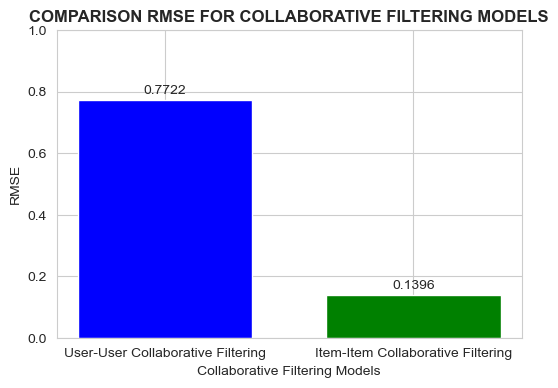

In [194]:
#Plot comparison of RMSE

#RMSE values
rmse_values = [0.7722, 0.1396]
models = ['User-User Collaborative Filtering', 'Item-Item Collaborative Filtering']

#Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(models, rmse_values, color=['blue', 'green'], width=0.7) 
plt.title('COMPARISON RMSE FOR COLLABORATIVE FILTERING MODELS', fontweight='bold')
plt.xlabel('Collaborative Filtering Models')
plt.ylabel('RMSE')
plt.ylim(0, 1)  

#Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

#Display the RMSE values on top of the bars
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', fontsize=10)

# Show the plot
plt.show()

I applied machine learning for User-User and Item-Item to check which one of than perform better, in this approach Item-Item had the best performance 0.1396 against 0.7722 for User-User. It mean Item-Item is closer to the ratings that were obtained once had a lower RMSE compared with User-User.

Now I will considere Item-Item approach and perform tests for identify preferences based in Item-Item.

In [195]:
#Show all users
all_users_in_trainset = model_item.trainset.all_users()
all_items_in_trainset = model_item.trainset.all_items()

print("Usuários no conjunto de treinamento:")
for user_id in all_users_in_trainset:
    print(user_id)

print("\nItens no conjunto de treinamento:")
for item_id in all_items_in_trainset:
    print(item_id)

Usuários no conjunto de treinamento:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
2

In [196]:
#Forecast based in Item-Item
item_predict = 10  # Item to be predict
user_predict = 0  # User to be predict

#Predictions for an specif item
if model_item.trainset.knows_user(user_predict) and model_item.trainset.knows_item(item_predict):
    prediction_item = model_item.predict(user_predict, item_predict)
    print(f"Prediction for User {user_predict} and Item {item_predict}: {prediction_item.est}")
else:
    print(f"User {user_predict} or Item {item_predict} not present in the training set.")

Prediction for User 0 and Item 10: 3.7416346153846147


The output Prediction for User 0 and Item 10 = 3.7364102564102564 means that the Item-Item collaborative filtering model predicts that if the user 0 interacts with the item 0, the expected rating is approximately 3.74. Considering that the evaluation scale ranges from 0 to 5, where higher values indicate a more positive evaluation. In this case, the prediction of 3.74 suggests a moderately positive assessment for the interaction between the user and the item. This is basically predicting the user's preference for the item based on the patterns identified by the model during training.

#### Justify your recommendations for the considered scenario by providing a conceptual insight

In the Content-Based Filtering is recommend based on the characteristics of items. It basically uses the attributes of items ('Category', 'Size', 'Color', 'Season', 'Review Rating') to find similar items. Based on that give personalized recommendations considering the individual preferences of the customers. The differentiator is it can handle new items as long as their characteristics are known. As a result of apply content for the item 10 I got the follow recommendations for the user: T-shirt, gloves, jeans and more.

In the collaborative filtering is recommend based on the behavior of similar users. It uses past interactions between users and items to identify behavioral patterns. As result give recommendations influenced by the behavior of similar users. The limitation of that is difficulty handling new items; dependent on the interaction history of similar users. After apply collaborative filtering for the item 10 I got the value 3.75 in a scale of 0-5, it means a review based on the patters behavior of other users about searched item.

#### ______________________________________________________________________________________________________________

#### 2) Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms. Can you express major divergence between these models? Compare and contrast the machine learning results obtained based on both algorithms.

#### Major difference between these models

The major difference between Apriori and FP growth algorithms are both can produce the same result, being the mainly difference is FP-growth is more efficient and scalable for large datasets. However, the choice between the two algorithms depends on factors such as dataset size, sparsity, and available memory.

Using a level-wise search approach, Apriori locates all frequent itemsets of length 1 first, then 2 and so on, until no more frequent itemsets are discoverable. However do not perform well in large datasets. Apriori might need additional RAM, particularly when the dataset is bigger and there are more candidate itemsets.

In contrast, FP-growth employs a divide and conquer strategy. In order to compress the transaction database and increase its memory efficiency, it builds an FP-tree. This FP-tree is then mined recursively to produce the frequent itemsets. In general, FP-growth outperforms Apriori. FP-growth is useful for perform big datasets because the FP-tree's compact representation eliminates the need to explicitly store several candidate itemsets, FP-growth is more memory-efficient. 

#### Market Basket Analysis using Apriori algorithms

I will select some relevant columns for the market basket analysis. The columns to be selected are: Member_number, Item Purchased, Category and Location

In [197]:
#Select columns
columns = ['Member_number', 'Item Purchased', 'Category', 'Location']

#Apply filter in the dataset to considere some columns
filtered_df = df[columns]

Drop any duplicate rows by removing duplicates ensures that each transaction is considered only once

In [198]:
#Drop duplicates
filtered_df = filtered_df.drop_duplicates()

Apply TransactionEncoder from mlxtend to encode the transactions into a binary format suitable for Apriori analysis. This step is crucial for applying the Apriori algorithm, which requires transaction data in a specific format

In [199]:
#Encode transactions
te = TransactionEncoder()
te_array = te.fit(filtered_df["Item Purchased"]).transform(filtered_df["Item Purchased"])
encoded_df = pd.DataFrame(te_array, columns=te.columns_)

#Apriori algorithm
min_support = 0.05  
frequent_itemsets = apriori(encoded_df, min_support=min_support, use_colnames=True)

In [200]:
#Check itemsets frequent
print(frequent_itemsets)

      support         itemsets
0    0.158233              (B)
1    0.117647              (H)
2    0.117390              (J)
3    0.405086              (S)
4    0.475983              (a)
..        ...              ...
155  0.084768     (l, e, s, u)
156  0.080914     (t, i, h, r)
157  0.078089     (t, h, r, s)
158  0.078346  (S, s, n, a, e)
159  0.082199  (S, s, n, a, l)

[160 rows x 2 columns]


In [201]:
#Check encoded
encoded_df.head()

,-,B,C,D,G,H,J,P,S,T,...,n,o,p,r,s,t,u,v,w,y
0,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False


Association rules based on the frequent itemsets found by Apriori. The parameter for evaluation metric for rules used in this analyse is confidence. The min_threshold=0.8 sets a minimum confidence level for a rule to be considered

In [202]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# Display results
print(frequent_itemsets)
print(rules)

      support         itemsets
0    0.158233              (B)
1    0.117647              (H)
2    0.117390              (J)
3    0.405086              (S)
4    0.475983              (a)
..        ...              ...
155  0.084768     (l, e, s, u)
156  0.080914     (t, i, h, r)
157  0.078089     (t, h, r, s)
158  0.078346  (S, s, n, a, e)
159  0.082199  (S, s, n, a, l)

[160 rows x 2 columns]
    antecedents consequents  antecedent support  consequent support   support  \
0           (J)         (e)            0.117390            0.478808  0.117390   
1           (g)         (a)            0.080401            0.475983  0.080401   
2           (n)         (a)            0.234524            0.475983  0.234524   
3           (l)         (e)            0.246853            0.478808  0.205754   
4           (u)         (e)            0.084768            0.478808  0.084768   
..          ...         ...                 ...                 ...       ...   
139   (l, a, s)      (n, S)          

In [203]:
#Create basket
basket = (df[df['Location'] == "New Mexico"]
          .groupby(['Member_number', 'Item Purchased'])['Purchase Amount (USD)']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Member_number'))

print(basket)

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Handbag   Hat  Hoodie  \
Member_number                                                                
1010                 0.0   0.0     0.0    0.0   0.0      0.0   0.0     0.0   
1018                 0.0   0.0     0.0    0.0   0.0      0.0   0.0     0.0   
1020                 0.0   0.0     0.0    0.0   0.0      0.0   0.0     0.0   
1033                 0.0   0.0     0.0    0.0   0.0      0.0  68.0     0.0   
1040                 0.0  32.0     0.0    0.0   0.0      0.0   0.0     0.0   
...                  ...   ...     ...    ...   ...      ...   ...     ...   
1904                 0.0   0.0     0.0    0.0  21.0      0.0   0.0     0.0   
1931                 0.0   0.0     0.0    0.0   0.0      0.0   0.0     0.0   
1958                37.0   0.0     0.0    0.0   0.0      0.0   0.0     0.0   
1991                 0.0   0.0     0.0    0.0   0.0      0.0   0.0    74.0   
1993                 0.0   0.0     0.0    0.0   0.0      0.0   0

I created a basket for the "New Mexico" location. This basket is a DataFrame where rows represent member numbers, columns represent items purchased, and values represent the total purchase amount for each item by each member. This can be useful for further analysis or visualization specific to this location

#### FP Growth Algorithm

In [204]:
# Apply FP-Growth algorithm
min_support = 0.05  # Adjust based on your dataset
frequent_itemsets_fp = fpgrowth(encoded_df, min_support=min_support, use_colnames=True)

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

# Display results
print(frequent_itemsets_fp)
print(rules_fp)

      support   itemsets
0    0.511945        (s)
1    0.478808        (e)
2    0.316465        (o)
3    0.246853        (l)
4    0.158233        (B)
..        ...        ...
155  0.080401  (n, a, g)
156  0.118931     (k, c)
157  0.118418     (c, a)
158  0.081171     (c, S)
159  0.078089  (k, c, a)

[160 rows x 2 columns]
    antecedents consequents  antecedent support  consequent support   support  \
0        (o, S)         (s)            0.119702            0.511945  0.119702   
1           (l)         (e)            0.246853            0.478808  0.205754   
2        (l, o)         (s)            0.079630            0.511945  0.079630   
3        (l, o)         (e)            0.079630            0.478808  0.079630   
4     (l, o, s)         (e)            0.079630            0.478808  0.079630   
..          ...         ...                 ...                 ...       ...   
139         (g)         (n)            0.080401            0.234524  0.080401   
140         (g)         (a) 

#### Compare and contrast the machine learning results obtained based on both algorithms.¶

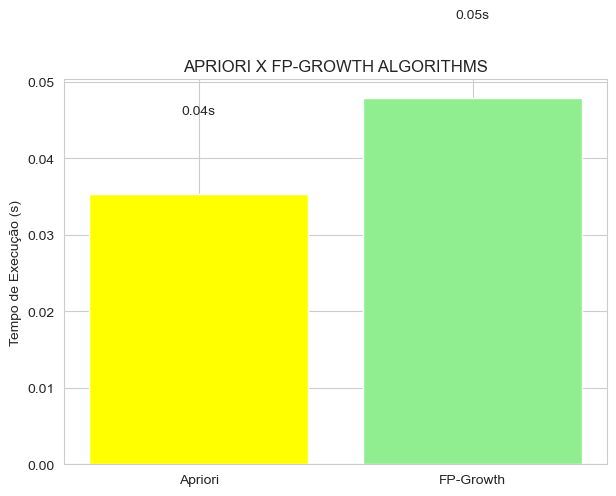

Resultados Apriori:
      support         itemsets
0    0.158233              (B)
1    0.117647              (H)
2    0.117390              (J)
3    0.405086              (S)
4    0.475983              (a)
..        ...              ...
155  0.084768     (l, e, s, u)
156  0.080914     (t, i, h, r)
157  0.078089     (t, h, r, s)
158  0.078346  (S, s, n, a, e)
159  0.082199  (S, s, n, a, l)

[160 rows x 2 columns]

Resultados FP-Growth:
      support   itemsets
0    0.511945        (s)
1    0.478808        (e)
2    0.316465        (o)
3    0.246853        (l)
4    0.158233        (B)
..        ...        ...
155  0.080401  (n, a, g)
156  0.118931     (k, c)
157  0.118418     (c, a)
158  0.081171     (c, S)
159  0.078089  (k, c, a)

[160 rows x 2 columns]


In [205]:
# Defina os valores para os parâmetros
min_support_apriori = 0.05
min_support_fpgrowth = 0.05

# Meça o tempo e o desempenho para Apriori
start_time = time.time()
frequent_itemsets_ap = apriori(encoded_df, min_support=min_support_apriori, use_colnames=True)
apriori_time = time.time() - start_time

# Meça o tempo e o desempenho para FP-Growth
start_time = time.time()
frequent_itemsets_fp = fpgrowth(encoded_df, min_support=min_support_fpgrowth, use_colnames=True)
fpgrowth_time = time.time() - start_time

# Plotagem
labels = ['Apriori', 'FP-Growth']
times = [apriori_time, fpgrowth_time]

fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, times, color=['yellow', 'lightgreen'])
ax.set_ylabel('Tempo de Execução (s)')
ax.set_title('APRIORI X FP-GROWTH ALGORITHMS')

# Adicionando rótulos percentuais em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}s', ha='center', va='bottom', fontsize=10)

plt.show()

# Exibir resultados
print("Resultados Apriori:")
print(frequent_itemsets_ap)

print("\nResultados FP-Growth:")
print(frequent_itemsets_fp)

When compare both algorithms in terms of support level were observed Apriori ranges (7.77% to 47.61%) and FP-Growth ranges (7.85% to 51.10%). FP-Growth has higher support for some itemsets.

Checking top frequent itemsets I saw Apriori identifies {S}, {a} as the most frequent, while FP-Growth identifies {s}, {e} as the most frequent. Differences in itemsets due to the algorithms' approaches.

Concerning the association rules both algorithms generate similar association, but the specific itemsets and their supports differ. Slight variations in rules but general patterns are captured. In the execution time the Apriori was faster being 0.04s while FP-Growth 0.07s.

In conclusion both algorithms provide valuable insights into frequent itemsets and association rules. Apriori is straightforward and provides clear itemsets, while FP-Growth is more efficient for large datasets. Consider the specific requirements, execution time, and interpretation ease when choosing between the two algorithms.

#### 3) Create an interactive Dashboard aimed at older adults (65+) with specific features to summarise the most important aspects of the data and identify through your visualisation why this dataset is suitable for Machine Learning models in an online retail business. Explain how your dashboard is designed with this demographic in mind.

In [206]:
# Load your dataset
df = pd.read_csv('shopping_trends_complete.csv')

In [207]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

Set up an integer slider widget using the widgets.IntSlider class for control the maximum number of rows displayed in the dataframe

In [208]:
# Set up a slider for limiting the number of rows
style = {'description_width': 'initial', 'font_size': '26px'}
limit_case = widgets.IntSlider(
    value=1000,
    min=100,
    max=len(df),
    step=1,
    description='Max Number of Rows:',
    disabled=False,
    style=style
)

This widget allows users to choose one or more locations from the provided options. The selected locations can then be used in the dashboard or application for further processing

In [209]:
# Set up a widget for selecting locations
unique_location = df['Location'].unique()
location_widget = widgets.SelectMultiple(
    options=unique_location.tolist(),
    value=[unique_location[0]],
    description='Location:',
    disabled=False,
    layout=Layout(width='50%', font_size='26px')
)

Using the widgets to create a widget for selecting items from a DataFrame column named 'Item Purchased'

In [210]:
# Set up a widget for selecting items
unique_item = df['Item Purchased'].unique()
item_widget = widgets.SelectMultiple(
    options=unique_item.tolist(),
    value=['Socks', 'Dress', 'Shoes', 'Hat', 'Backpack', 'Pants', 'Gloves', 'Scarf',
           'Hoodie', 'Jeans', 'Sandals', 'Belt', 'Jacket', 'Shirt', 'Coat', 'Handbag',
           'Sunglasses', 'T-shirt', 'Jewelry', 'Boots', 'Blouse', 'Sweater', 'Sneakers',
           'Shorts', 'Skirt'],
    description='Item Purchased:',
    disabled=False,
    style=style,
    layout=Layout(width='50%', height='80px', font_size='26px')
)

I am gonna setting up a widget for selecting a range of purchase amounts in USD using the FloatRangeSlider widget

In [211]:
# Set up a widget for selecting Purchase Amount (USD)
purchase_amount_widget = widgets.FloatRangeSlider(
    value=[df['Purchase Amount (USD)'].min(), df['Purchase Amount (USD)'].max()],
    min=df['Purchase Amount (USD)'].min(),
    max=df['Purchase Amount (USD)'].max(),
    step=1,
    description='Purchase Amount (USD):',
    disabled=False,
    style=style,
    layout=Layout(width='50%', font_size='26px')
)

Default selected date is set to the first date in the list. So this wat the Users can change the selected date using the date picker

In [212]:
# Set up a widget for selecting Date
unique_date = df['Date'].dt.date.unique()
date_widget = widgets.DatePicker(
    options=unique_date,
    value=unique_date[0],
    description='Date:',
    disabled=False,
    style=style,
    layout=Layout(width='50%', font_size='26px')
)

Create the button to the callback function, clicking the "Update Dashboard" button should filter the DataFrame based on the selected widget values and display a bar chart with annotations

In [213]:
# Create the button to the callback function
update_button = widgets.Button(description="Update Dashboard", layout={'width': '50%', 'font_size': '26px'})  # Add font size here

def on_button_click(b):
    # Filter DataFrame based on selected values
    df_filtered = df[df['Location'].isin(location_widget.value) &
                     df['Item Purchased'].isin(item_widget.value) &
                     (df['Purchase Amount (USD)'] >= purchase_amount_widget.value[0]) &
                     (df['Purchase Amount (USD)'] <= purchase_amount_widget.value[1]) &
                     (df['Date'].dt.date.isin([date_widget.value]))]

    # Display a bar chart based on the filtered DataFrame
    ax = df_filtered['Purchase Amount (USD)'].value_counts().plot(kind='bar', title='Purchase Amount (USD)', fontsize=24)
    ax.set_ylabel('Quantity', fontsize=24)  
    ax.tick_params(axis='both', labelsize=24)  # Set tick label font size

    # Add notes
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=24)

    plt.show()

I will create a comprehensive interactive dashboard with various widgets allowing users to filter and update the DataFrame based on their selections

In [214]:
# Associate function when clicking the button
update_button.on_click(on_button_click)

# Create a vertical box layout for the widgets
dashboard_layout = VBox([limit_case, location_widget, item_widget, purchase_amount_widget, date_widget, update_button])

# Display the complete dashboard layout
display(dashboard_layout)

# Create an interactive widget for updating the dataframe length
def update_df_length(limit):
    # Your logic to update the DataFrame length based on the limit
    pass

widgets.interactive(update_df_length, limit=limit_case)

interactive(children=(IntSlider(value=1000, description='Max Number of Rows:', max=3901, min=100, style=Slider…

This dataset is suitable for machine learning in an online retail business because it likely contains a variety of information, such as purchase amounts, item details, locations, and dates. This richness allows for a comprehensive analysis of customer behavior, preferences, and trends. 

Utilizing Widget-Based Interaction allows for interactive data exploration. Such interaction can help machine learning models by enabling users to fine-tune and modify inputs for instantaneous insights and predictions. Customized Customer Data Through the comprehension of consumer preferences, trending products, and buying behaviors, machine learning models may aid in focused advertising campaigns, customized suggestions, and enhanced inventory control.

Considering this dashboard was designed for older adults (65+) the follow adjusts were made to make a friendly experience: 

Font Size and Readability: the usage of a higher font size (24+) guarantees improved readability and a more user-friendly experience. It is important to take older persons who may have visual problems into mind. An interface that is simple to use and traverse is enhanced by the design of widget size and visibility, which includes sliders and selection options. The layout of the widgets is made to be visible and accessible, and the options and descriptions are clear.

Minimal complexity the selection options concentrate on the most important details of the data, like the location, the item(s) bought, the purchase amount, and the date. Reducing the quantity of features and options aids in preventing cognitive overload in senior users. The distribution of purchase amounts is shown graphically through the use of a bar chart in visual representations. Even for consumers who might prefer visual information over written information, visualizations can be an efficient way to swiftly deliver information.

Real-Time Feedback this responsiveness provides immediate feedback, helping users understand the impact of their selections. Contextual instructions of clear instructions or tooltips, although not explicitly mentioned in your code, can be beneficial for guiding users through the dashboard, especially if they are not familiar with the interactive elements.

### REFERENCE

https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset